In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
print(df.shape)
df.head()

(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
#unique countries
print(df['Country'].nunique())
df.columns = df.columns.str.strip().str.replace(' ','_')
df.columns

193


Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [5]:
pd.isnull(df).sum(axis=0)

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [14]:
df[df['Life_expectancy'].isnull()]['Country']
#df[df['Country']=='Algeria']['Alcohol']

624              Cook Islands
769                  Dominica
1650         Marshall Islands
1715                   Monaco
1812                    Nauru
1909                     Niue
1958                    Palau
2167    Saint Kitts and Nevis
2216               San Marino
2713                   Tuvalu
Name: Country, dtype: object

In [114]:
#df['Alcohol'] = df['Alcohol'].fillna(df.groupby(['Country'])['Alcohol'].transform('mean'))
#df['Hepatitis_B'] = df['Hepatitis_B'].fillna(df.groupby(['Country'])['Hepatitis_B'].transform('mean'))
#df['BMI'] = df['BMI'].fillna(df.groupby(['Country'])['BMI'].transform('mean'))
#df['Polio'] = df['Polio'].fillna(df.groupby(['Country'])['Polio'].transform('mean')) 
#df['Total_expenditure'] = df['Total_expenditure'].fillna(df.groupby(['Country'])['Total_expenditure'].transform('mean'))
#df['Diphtheria'] = df['Diphtheria'].fillna(df.groupby(['Country'])['Diphtheria'].transform('mean'))

In [6]:
country_list = df['Country'].unique()
fill_list = ['Life_expectancy','Adult_Mortality','Alcohol','Hepatitis_B','BMI','Polio','Total_expenditure','Diphtheria','GDP',
             'Population','thinness__1-19_years','thinness_5-9_years','Income_composition_of_resources','Schooling']
for country in country_list:
    df.loc[df['Country'] == country,fill_list] = df.loc[df['Country'] == country,fill_list].interpolate(method='linear')

In [7]:
pd.isnull(df).sum(axis=0)

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            193
percentage_expenditure               0
Hepatitis_B                        144
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                                0
Total_expenditure                  211
Diphtheria                           0
HIV/AIDS                             0
GDP                                422
Population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [8]:
df.dropna(inplace=True)
pd.isnull(df).sum(axis=0)

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [16]:
#Avg life expectancy per country
df.groupby(['Country'])['Life_expectancy'].mean().reset_index().sort_values('Life_expectancy', ascending=False)

,Country,Life_expectancy
115,Sweden,82.526667
43,France,82.206667
60,Italy,82.153333
111,Spain,82.020000
6,Australia,81.746667
24,Canada,81.653333
7,Austria,81.480000
48,Greece,81.233333
59,Israel,81.220000
46,Germany,81.186667


In [9]:
df_india = df[df['Country']=='India'][['Year','Population']]
df_india

,Year,Population
1187,2014,1.293859e+09
1188,2013,1.278562e+08
1189,2012,1.263659e+08
1190,2011,1.247236e+08
1191,2010,1.239869e+07
1192,2009,1.214271e+08
1193,2008,1.197147e+08
1194,2007,1.179681e+09
1195,2006,1.161978e+09
1196,2005,1.144119e+09


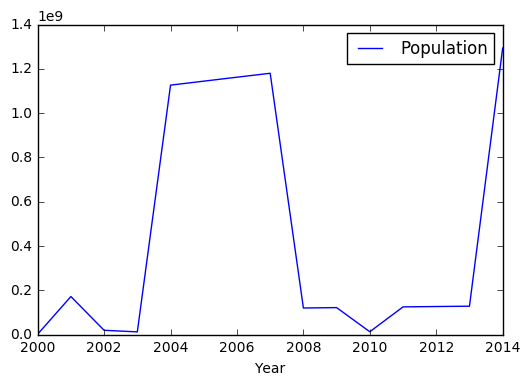

In [10]:
df_india.plot(x='Year',y='Population')

In [11]:
((df_india.loc[df_india['Year']==2001]['Population'][1200] - df_india.loc[df_india['Year']==2000]['Population'][1201])/df_india.loc[df_india['Year']==2000]['Population'][1201])*100

11064.56248795504

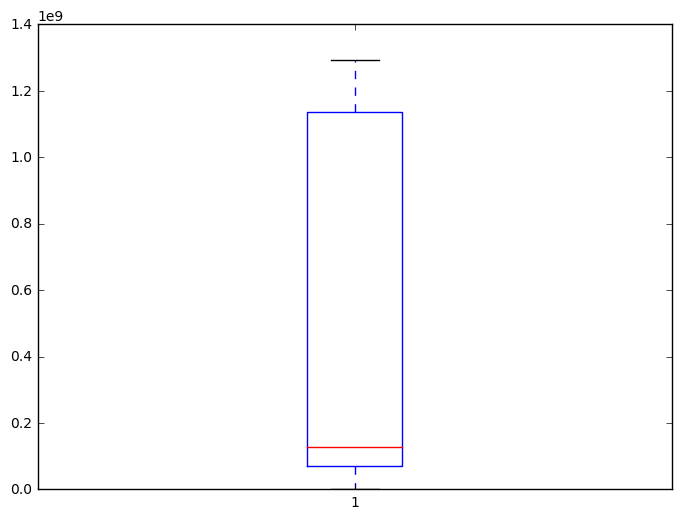

In [12]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = df_india['Population'].values

plt.boxplot(original_Population)
plt.show()

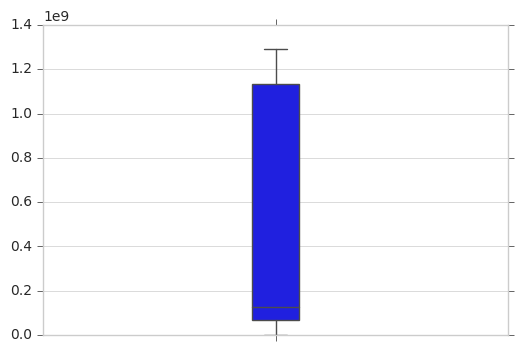

In [13]:
sns.set_style('whitegrid')
sns.boxplot(y=original_Population,width=0.1)

In [14]:
df_india.describe()

,Year,Population
count,15.000000,1.500000e+01
mean,2007.000000,4.494725e+08
std,4.472136,5.391612e+08
min,2000.000000,1.535912e+06
25%,2003.500000,6.935090e+07
50%,2007.000000,1.263659e+08
75%,2010.500000,1.135127e+09
max,2014.000000,1.293859e+09


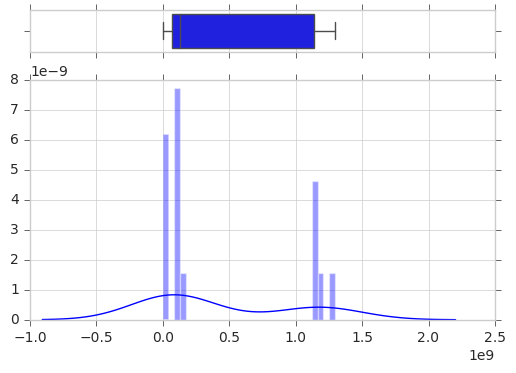

In [15]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(original_Population, ax=ax_box)
sns.distplot(original_Population, ax=ax_hist,bins=30)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')


In [17]:
z_scores = stats.zscore(df_india['Population'])
abs_z_scores = np.abs(z_scores)

In [18]:
(abs_z_scores < 3).all()

True

In [47]:
print(df.groupby(['Status'])['Life_expectancy'].mean().reset_index())
df['Status'].value_counts()

       Status  Life_expectancy
0   Developed        78.831579
1  Developing        66.164982


Developing    1702
Developed      285
Name: Status, dtype: int64

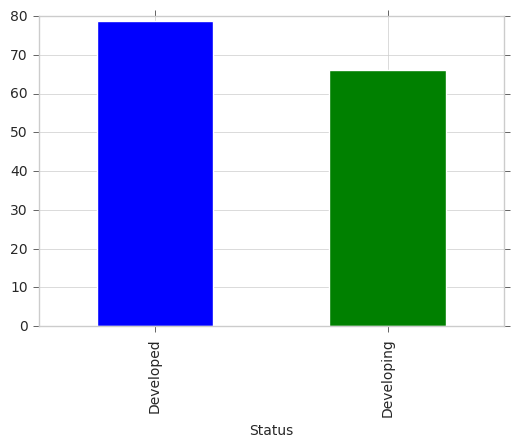

In [19]:
df.groupby(['Status'])['Life_expectancy'].mean().plot(kind='bar')

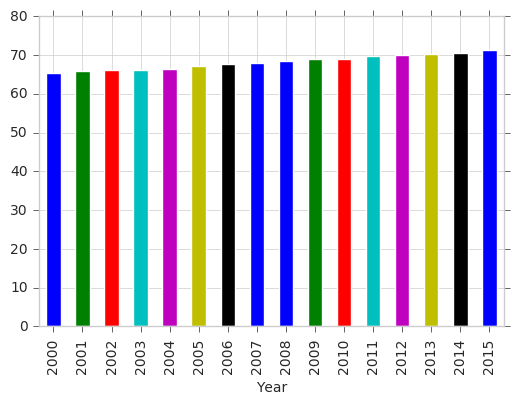

In [20]:
df.groupby(['Year'])['Life_expectancy'].mean().plot(kind='bar')

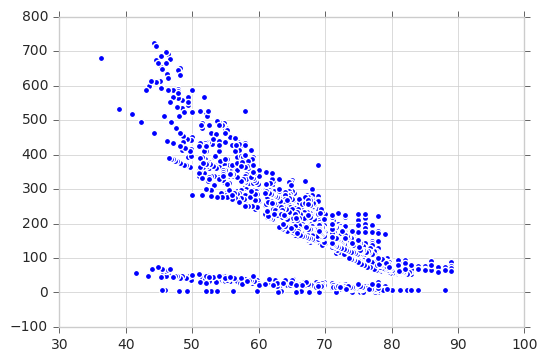

In [23]:
plt.scatter()

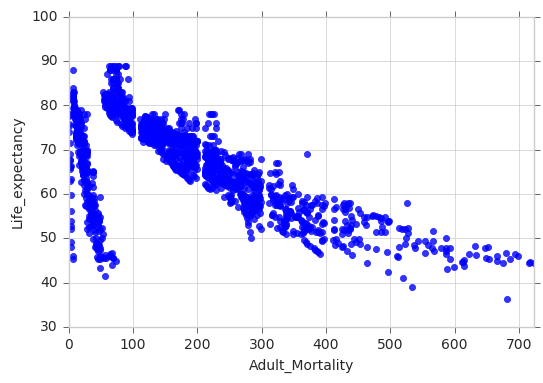

In [34]:
fig, ax = plt.subplots()
ax.set_xlim(0, df['Adult_Mortality'].max())
sns.regplot(x=df['Adult_Mortality'],y=df['Life_expectancy'],fit_reg=False)

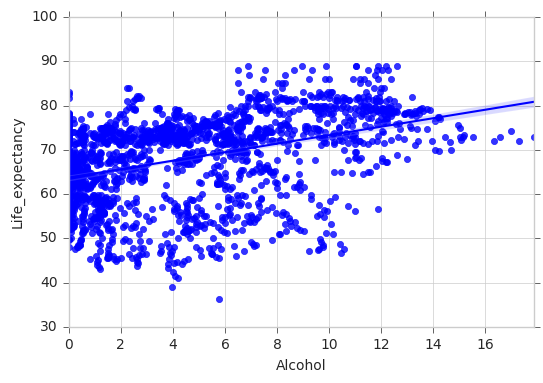

In [33]:
fig, ax = plt.subplots()
ax.set_xlim(0, df['Alcohol'].max())
sns.regplot(x=df['Alcohol'],y=df['Life_expectancy'])

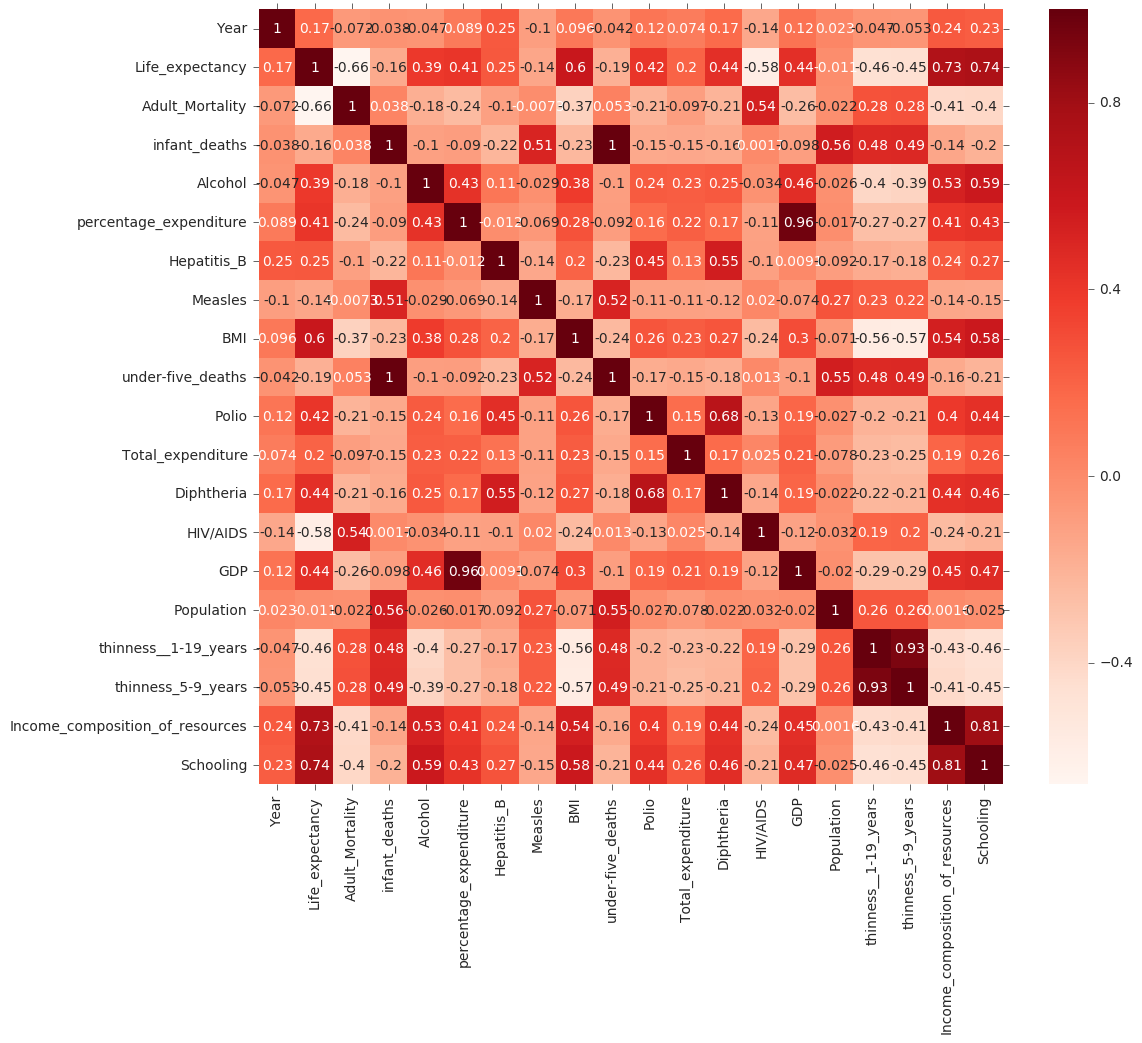

In [36]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [39]:
cor_target = abs(cor['Life_expectancy'])

In [40]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features
#upon checking Income_composition_of_resources and Schooling are highly correlated so removing one
#Adult_mortality and HIV are also correlated so removing HIV because it is less correlated to target variable

Life_expectancy                    1.000000
Adult_Mortality                    0.660529
BMI                                0.599572
HIV/AIDS                           0.576373
Income_composition_of_resources    0.726753
Schooling                          0.744703
Name: Life_expectancy, dtype: float64

In [148]:
feature_df = df[['Status','Life_expectancy','Schooling','BMI','Adult_Mortality','GDP']]

# Convert categorical values to numerical values using one-hot encoding for 'Status' feature.
feature_df = pd.concat([feature_df,pd.get_dummies(feature_df['Status'],drop_first=True)],axis=1)
final = feature_df.drop('Status',axis=1)
final.tail()

,Life_expectancy,Schooling,BMI,Adult_Mortality,GDP,Developing
2933,44.3,9.2,27.1,723.0,454.366654,1
2934,44.5,9.5,26.7,715.0,453.351155,1
2935,44.8,10.0,26.3,73.0,57.348340,1
2936,45.3,9.8,25.9,686.0,548.587312,1
2937,46.0,9.8,25.5,665.0,547.358879,1


In [149]:
final.iloc[:,0].head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life_expectancy, dtype: float64

In [150]:
X = final.iloc[:,1:].values
y = final.iloc[:,0].values

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
reg = LinearRegression(fit_intercept=True, normalize=True)

reg.fit(X_train,y_train)

print('Slope : ', (reg.coef_))
print('Intercept : ' ,(reg.intercept_))


Slope :  [ 1.33531620e+00  7.80866251e-02 -2.93672686e-02  5.55233275e-05
 -6.74393861e-01]
Intercept :  55.02490914996503


In [157]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7471071571454231
Root Mean Squared Error: 4.995876423791366


In [153]:
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.81146862 0.72335084 0.74862009 0.59299907 0.67783701]
Average 5-Fold CV Score: 0.7108551262692052


In [154]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(reg,X,y,cv=3)
r2_score(y,y_pred)

0.7298375323873421

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
        ('reg_scaled', LinearRegression())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)


reg_scaled = pipeline.fit(X_train,y_train)

#print('Slope : ', (reg_scaled.coef_))
#print('Intercept : ' ,(reg_scaled.intercept_))

y_pred = reg_scaled.predict(X_test)
print("R^2: {}".format(r2_score(y_test,y_pred)))


print("R^2: {}".format(reg_scaled.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.7471071571454231
R^2: 0.7471071571454231
Root Mean Squared Error: 4.995876423791366


In [158]:
from sklearn.linear_model import Ridge
rm = Ridge()
rm.fit(X_train,y_train)
pred2 = rm.predict(X_test)

print("R^2: {}".format(r2_score(y_test,pred2)))
print("R^2: {}".format(rm.score(X_test, y_test)))



R^2: 0.7471043164315638
R^2: 0.7471043164315638
